In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("results/su_ddpg_5_14/ddpg.csv")

In [61]:
data[700:800]

,episode,steps,episode_reward,max_reward,min_reward,max_pi_loss,min_pi_loss,mean_pi_loss,max_q_loss,min_q_loss,mean_q_loss
700,701,1600,-153.834881,0.541126,-0.458776,-103.331276,-139.032100,-124.039490,527.572300,3.599255,24.047470
701,702,329,-119.559840,0.424560,-100.000000,-100.521484,-136.710860,-121.532600,647.495850,3.845913,20.962105
702,703,699,-130.763327,0.485110,-100.000000,-104.305690,-136.299850,-120.441000,520.583560,3.387377,21.019674
703,704,87,-125.954072,0.080927,-100.000000,-104.201836,-133.929280,-119.908900,486.531980,4.201049,23.726809
704,705,1600,-46.158931,0.550825,-0.406354,-91.862420,-130.966220,-114.511900,649.881200,2.436254,18.167828
705,706,400,-156.684687,0.337530,-100.000000,-93.349080,-127.965515,-111.798410,497.673430,3.239837,16.609520
706,707,1600,-125.062760,0.389356,-0.456814,-83.460915,-121.973434,-106.612080,637.688900,2.295880,20.457680
707,708,1600,-122.263957,0.465125,-0.365572,-75.686740,-117.113800,-100.665420,413.240080,2.485253,17.273966
708,709,93,-122.918802,0.033107,-100.000000,-80.862700,-110.589700,-98.738000,177.025800,2.713907,12.436174
709,710,284,-148.490359,0.226653,-100.000000,-86.124480,-111.443565,-99.108450,408.838350,2.970075,18.404963


In [29]:
def analyze_data(data):
    plt.figure(figsize=(20,15))
    ax = plt.subplot(3, 1, 1)
    ax.set_ylim(-350, 350)
    sns.lineplot(x="episode", y="episode_reward", data=data, ax=ax)
    
    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x="episode", y="mean_pi_loss", data=data, ax=ax)
    
    ax = plt.subplot(3, 1, 3)
    sns.lineplot(x="episode", y="mean_q_loss", data=data, ax=ax)

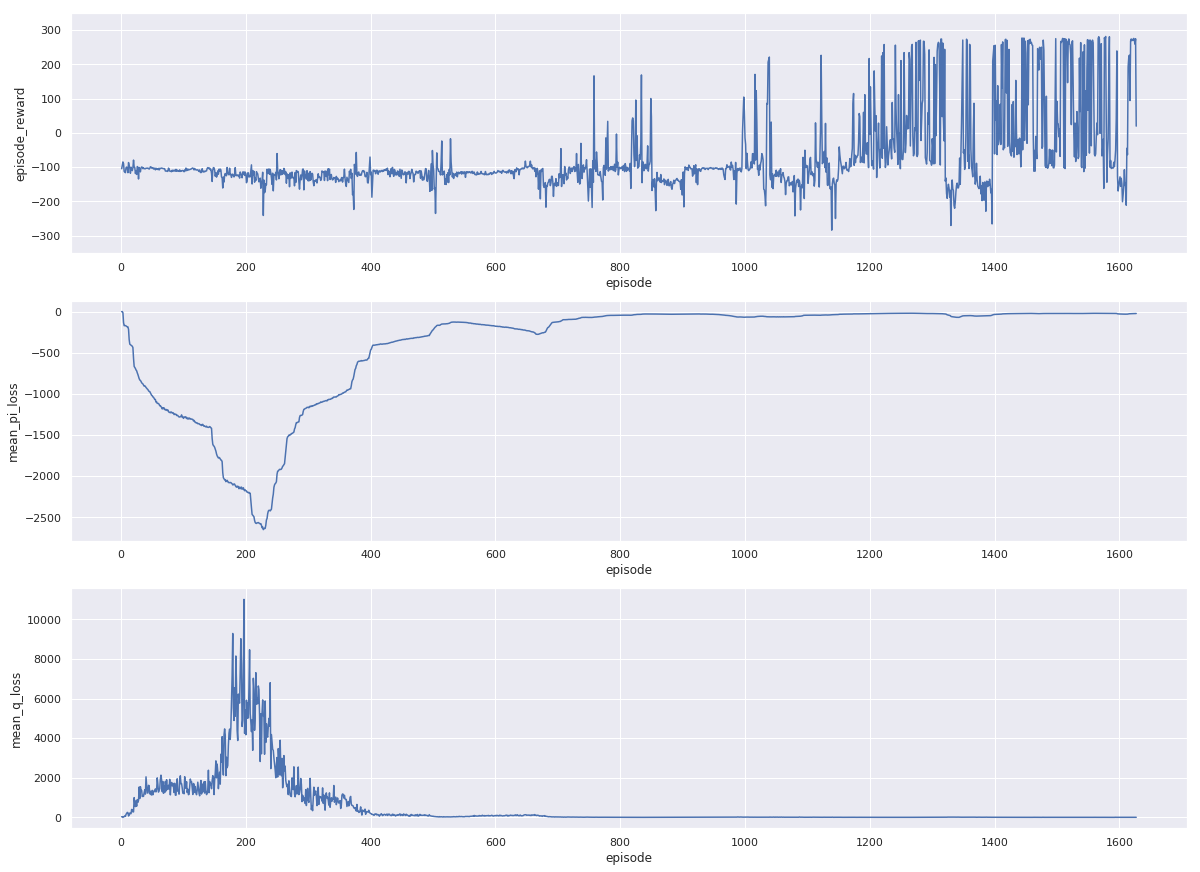

In [30]:
analyze_data(data)

In [42]:
print(data[500:600].episode_reward.mean())
print(data[500:600].max_reward.mean())

0.08551510812549591

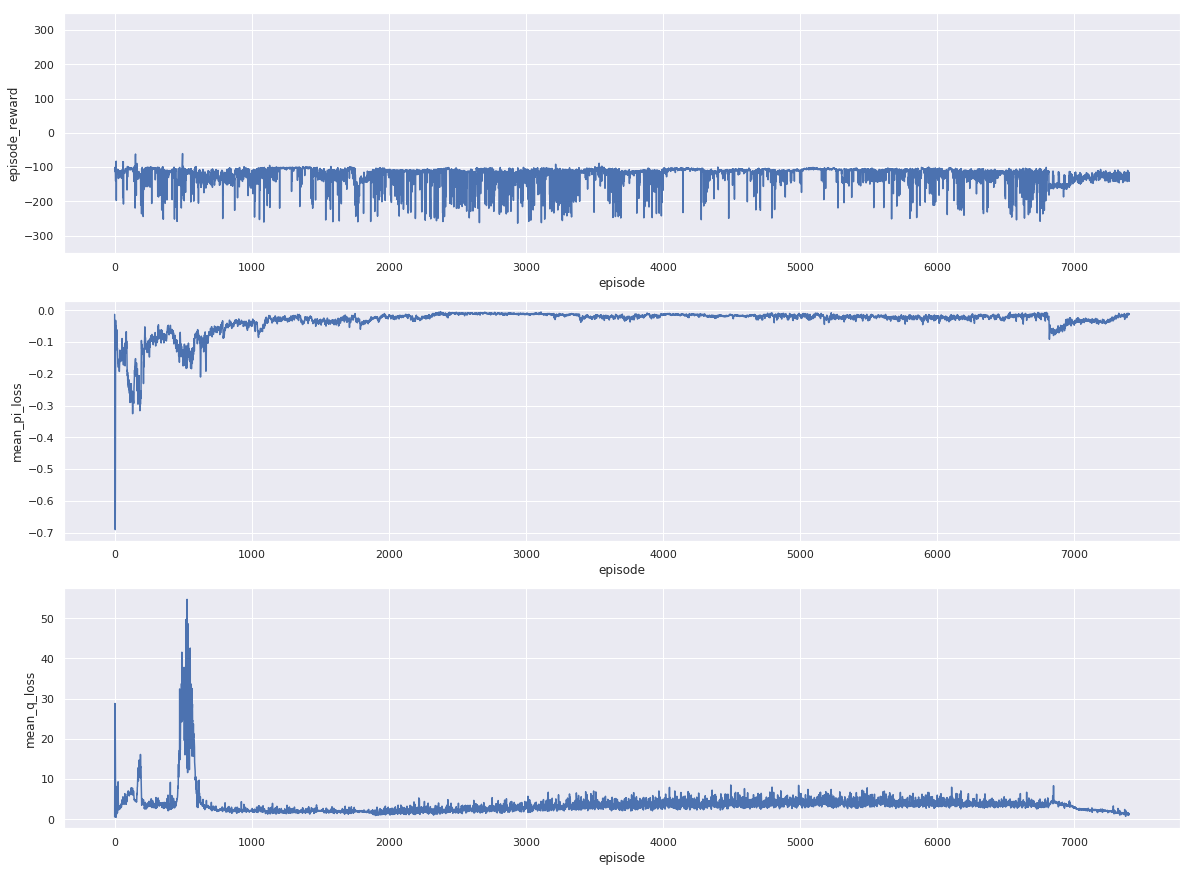

In [75]:
current_data = pd.read_csv("ddpg.csv")
analyze_data(current_data)

In [76]:
for i in range(len(current_data) // 100):
    print(current_data[100*i:100*i + 100].episode_reward.mean())

print()
for i in range(len(current_data) // 100):
    print(current_data[100*i:100*i + 100].max_reward.mean())

-115.99429966801861
-118.4582457173882
-117.9138053186552
-127.74799094238273
-131.4607491473312
-122.33246919697532
-134.7237734853247
-128.35186433266364
-128.43073590201158
-122.37570835188204
-125.6435038336952
-112.20093555699239
-105.2285740924553
-106.98673080383003
-115.13301544491273
-129.32415734907067
-124.33167641637856
-137.31824667983082
-134.65890595124839
-119.34858357770257
-127.46920494839354
-124.66067998235206
-126.70583280003434
-128.89137029540464
-134.23875475271151
-136.67497978141805
-123.56512660992647
-133.40689069878266
-133.40805208603481
-127.50838688291861
-132.00654508054762
-127.8584208263592
-144.9467045628075
-138.21462031632845
-112.4624417044002
-109.33527753275344
-128.63724417648393
-117.8239680613165
-126.94911887296075
-127.67452034733826
-106.96161919114982
-107.38191942088625
-110.84777777045582
-122.0564168103381
-114.5416187778911
-110.77262899813459
-115.662696066685
-114.78967814733159
-122.7646354298062
-114.95425654914618
-107.2581709991

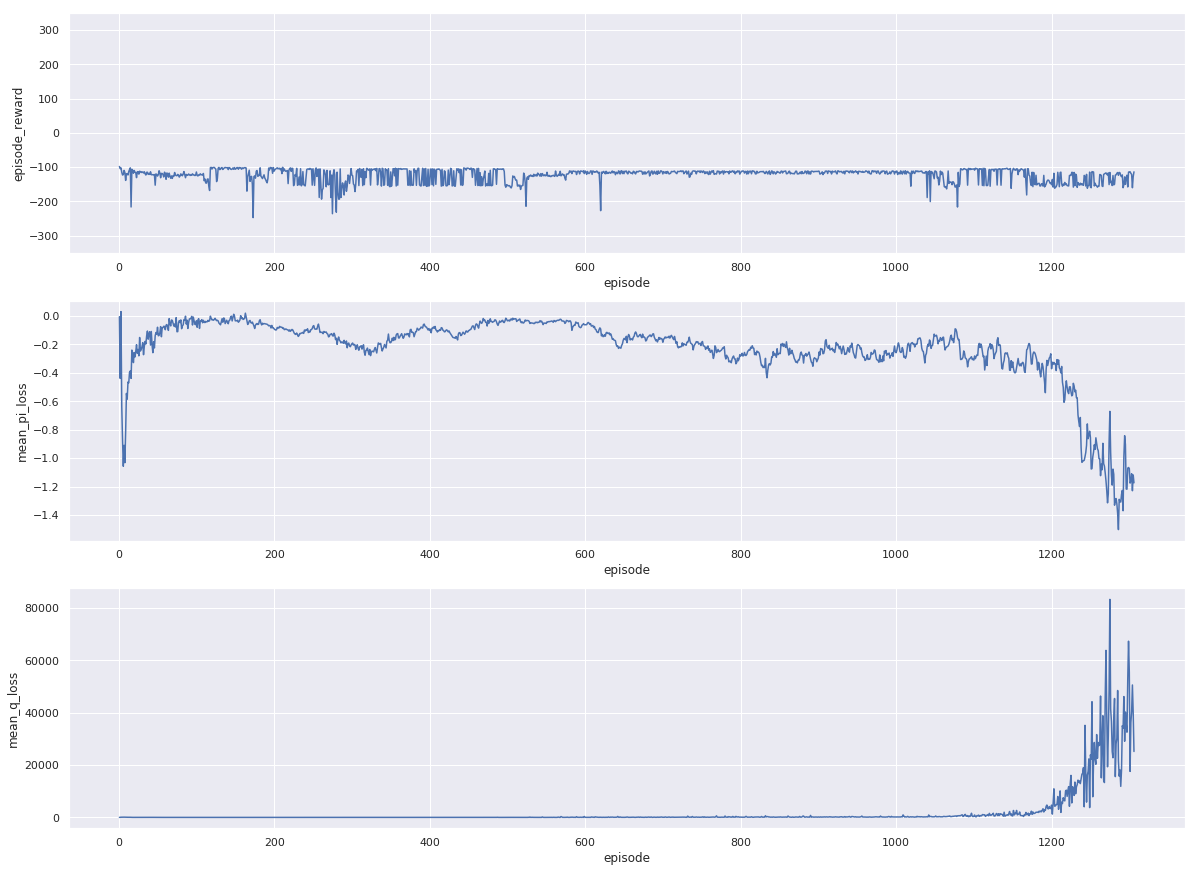

In [33]:
current_data = pd.read_csv("results/ddpg_5_15/ddpg1.csv")
analyze_data(current_data)